In [132]:
import numpy as np
import matplotlib.pyplot as plt

project = 'july6'
traindate = '2023-07-27'
testdate = '2023-07-28'
traindate_path = '/home/sdybing/gnss-picker/cnn_models_outputs/' + project + '_fq_train/models/traindate_' + traindate + '/'
test_outputs_path = traindate_path + 'data/'
figure_save_dir = traindate_path + 'figures/explore_falsepos/'

best_thresh = 0.13 # From code 2

results = np.load(test_outputs_path + 'fqtest_metadata_with_results_pgd_snr_locs_hypdists.npy')
# Columns:

# 0: FQ rupture name
# 1: station name
# 2: magnitude
# 3: result (true pos, etc.)
# 4: PGD
# 5: SNR_N
# 6: SNR_E
# 7: SNR_Z
# 8: FQ rupture hypocenter lat
# 9: FQ rupture hypocenter lon
# 10: FQ rupture hypocenter depth
# 11: station lat
# 12: station lon
# 13: hypocentral distance (m)

waveforms = np.load(test_outputs_path + testdate + '_fqtest_data.npy')
predictions = np.load(test_outputs_path + testdate + '_fqtest_predictions.npy')
targets = np.load(test_outputs_path + testdate + '_fqtest_target.npy')

In [2]:
all_mags = results[:,2]
all_pgds = results[:,4]
all_snrns = results[:,5]
all_snres = results[:,6]
all_snrzs = results[:,7]

all_mags_float = []
for mag in all_mags:
    if mag != 'nan':
        mag = float(mag)
        all_mags_float.append(mag)

all_pgds_float = []
for pgd in all_pgds:
    if pgd != 'nan':
        pgd = float(pgd)
        all_pgds_float.append(pgd)
    
all_snrns_float = []
for snrn in all_snrns:
    if snrn != 'nan':
        snrn = float(snrn)
        all_snrns_float.append(snrn)
    
all_snres_float = []
for snre in all_snres:
    if snre != 'nan':
        snre = float(snre)
        all_snres_float.append(snre)

all_snrzs_float = []
for snrz in all_snrzs:
    if snrz != 'nan':
        snrz = float(snrz)
        all_snrzs_float.append(snrz)
    
all_mags = all_mags_float
all_pgds = all_pgds_float
all_snrns = all_snrns_float
all_snres = all_snres_float
all_snrzs = all_snrzs_float

In [3]:
waveforms = np.load(test_outputs_path + testdate + '_fqtest_data.npy')
predictions = np.load(test_outputs_path + testdate + '_fqtest_predictions.npy')
targets = np.load(test_outputs_path + testdate + '_fqtest_target.npy')

In [4]:
truepos_idxs = np.where(results[:,3] == 'true pos')[0]
falsepos_idxs = np.where(results[:,3] == 'false pos')[0]
trueneg_idxs = np.where(results[:,3] == 'true neg')[0]
falseneg_idxs = np.where(results[:,3] == 'false neg')[0]

In [5]:
print(results.shape)

print('Percent true positive: ' + str(np.round(100*len(truepos_idxs)/len(results),1)) + '%')
print('Percent true negative: ' + str(np.round(100*len(trueneg_idxs)/len(results),1)) + '%')
print('Percent false positive: ' + str(np.round(100*len(falsepos_idxs)/len(results),1)) + '%')
print('Percent false negative: ' + str(np.round(100*len(falseneg_idxs)/len(results),1)) + '%')

(91738, 14)
Percent true positive: 13.5%
Percent true negative: 47.8%
Percent false positive: 2.2%
Percent false negative: 36.5%


In [6]:
negfigure_save_dir = traindate_path + '/figures/explore_falseneg/'

In [8]:
mags = results[falseneg_idxs][:,2]
pgds = results[falseneg_idxs][:,4]
snrns = results[falseneg_idxs][:,5]
snres = results[falseneg_idxs][:,6]
snrzs = results[falseneg_idxs][:,7]

mags_float = []
for mag in mags:
    mag = float(mag)
    mags_float.append(mag)

pgds_float = []
for pgd in pgds:
    pgd = float(pgd)
    pgds_float.append(pgd)
    
snrns_float = []
for snrn in snrns:
    if snrn != 'nan':
        snrn = float(snrn)
        snrns_float.append(snrn)
    
snres_float = []
for snre in snres:
    if snre != 'nan':
        snre = float(snre)
        snres_float.append(snre)
    
snrzs_float = []
for snrz in snrzs:
    if snrz != 'nan':
        snrz = float(snrz)
        snrzs_float.append(snrz)
    
mags = mags_float
pgds = pgds_float
snrns = snrns_float
snres = snres_float
snrzs = snrzs_float

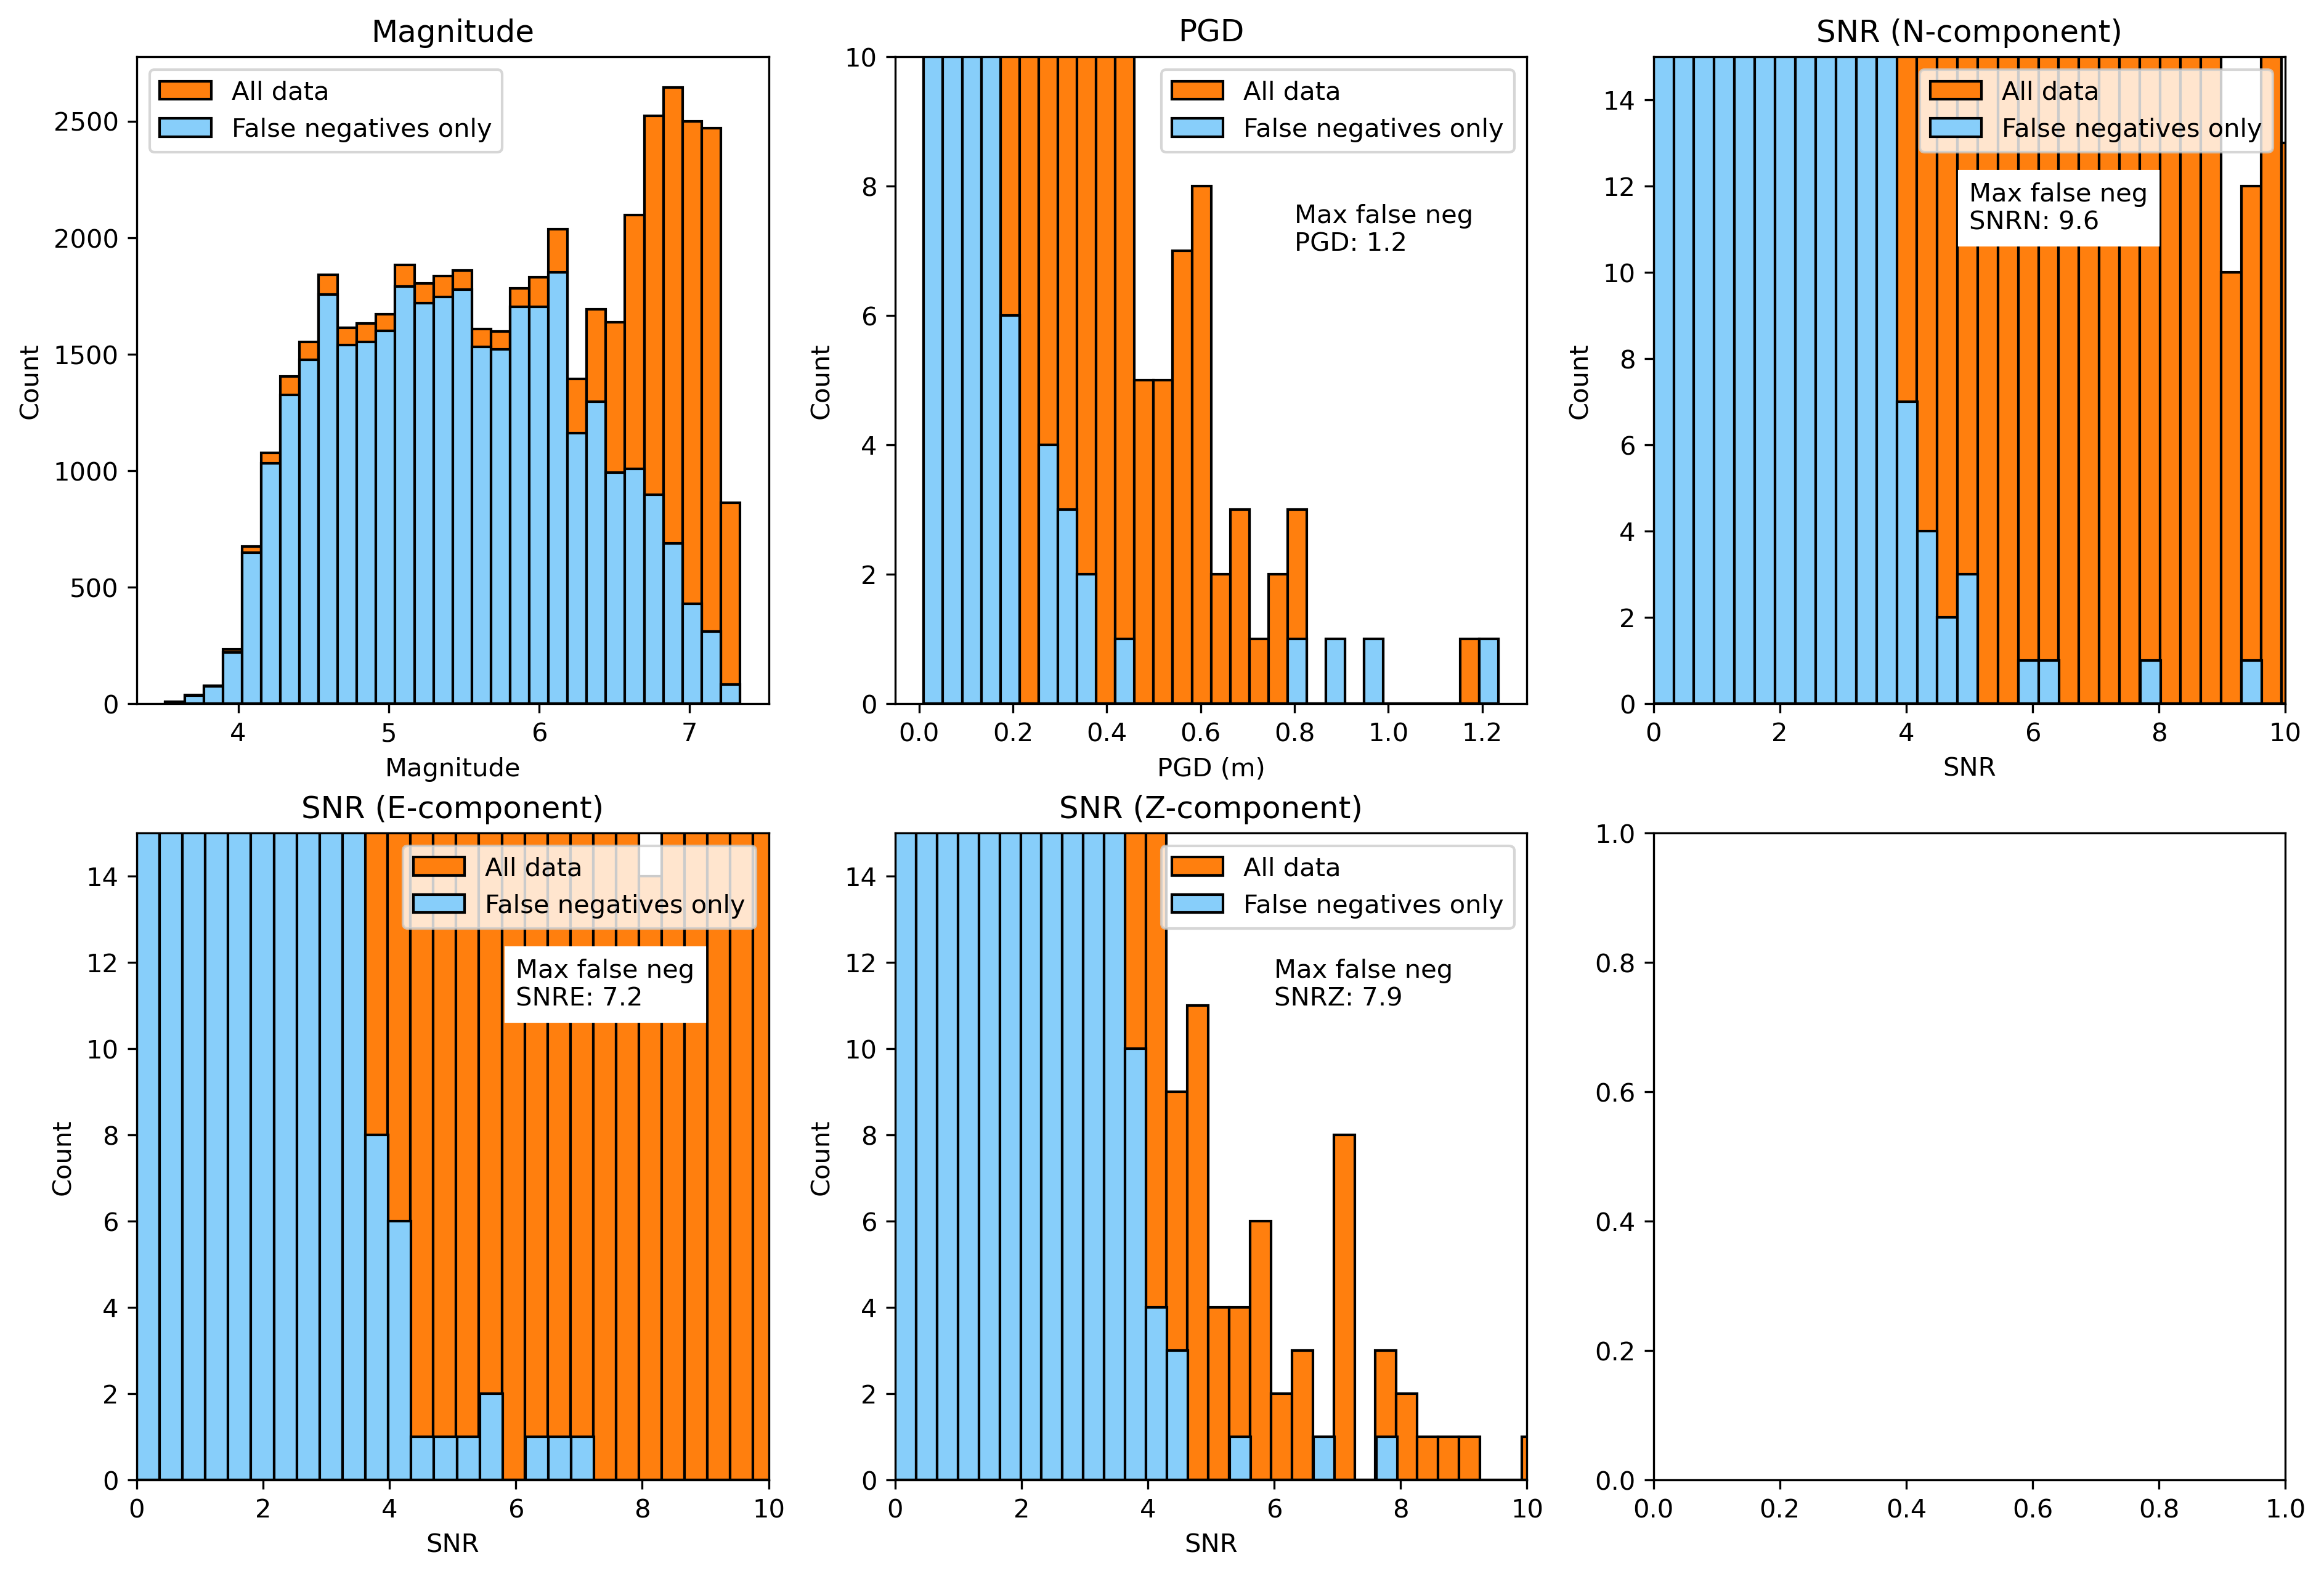

In [133]:
close_look = True

fig = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10), dpi = 300, facecolor = 'white')

plt.subplot(231)
plt.title('Magnitude')
plt.hist(all_mags, bins = 30, color = 'C1', edgecolor = 'black', label = 'All data')
plt.hist(mags, bins = 30, color = 'lightskyblue', edgecolor = 'black', label = 'False negatives only')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.legend()

plt.subplot(232)
plt.title('PGD')
if close_look:
    plt.hist(all_pgds, bins = 30, color = 'C1', edgecolor = 'black', label = 'All data')
    plt.hist(pgds, bins = 30, color = 'lightskyblue', edgecolor = 'black', label = 'False negatives only')
    plt.ylim(0,10)
    plt.text(s = 'Max false neg\nPGD: ' + str(np.round(max(pgds),1)), x = 0.8, y = 7, backgroundcolor = 'white')
else:
    plt.hist(all_pgds, bins = 25, color = 'C1', edgecolor = 'black', label = 'All data')
    plt.hist(pgds, bins = 25, color = 'lightskyblue', edgecolor = 'black', label = 'False negatives only')
    plt.ylim(0,750)
    plt.text(s = 'Max false neg\nPGD: ' + str(np.round(max(pgds),1)), x = 0.8, y = 550, backgroundcolor = 'white')
plt.xlabel('PGD (m)')
plt.ylabel('Count')
plt.legend()

plt.subplot(233)
plt.title('SNR (N-component)')
if close_look:
    plt.hist(all_snrns, bins = 410, color = 'C1', edgecolor = 'black', label = 'All data')
    plt.hist(snrns, bins = 30, color = 'lightskyblue', edgecolor = 'black', label = 'False negatives only')
    plt.xlim(0,10)
    plt.ylim(0,15)
    plt.text(s = 'Max false neg\nSNRN: ' + str(np.round(max(snrns),1)), x = 5, y = 11, backgroundcolor = 'white')
else:
    plt.hist(all_snrns, bins = 340, color = 'C1', edgecolor = 'black', label = 'All data')
    plt.hist(snrns, bins = 25, color = 'lightskyblue', edgecolor = 'black', label = 'False negatives only')
    plt.xlim(0,10)
    plt.ylim(0,4000)
    plt.text(s = 'Max false neg\nSNRN: ' + str(np.round(max(snrns),1)), x = 5, y = 3000, backgroundcolor = 'white')
plt.xlabel('SNR')
plt.ylabel('Count')
plt.legend()

plt.subplot(234)
plt.title('SNR (E-component)')
if close_look:
    plt.hist(all_snres, bins = 285, color = 'C1', edgecolor = 'black', label = 'All data')
    plt.hist(snres, bins = 20, color = 'lightskyblue', edgecolor = 'black', label = 'False negatives only')
    plt.xlim(0,10)
    plt.ylim(0,15)
    plt.text(s = 'Max false neg\nSNRE: ' + str(np.round(max(snres),1)), x = 6, y = 11, backgroundcolor = 'white')
else:
    plt.hist(all_snres, bins = 280, color = 'C1', edgecolor = 'black', label = 'All data')
    plt.hist(snres, bins = 20, color = 'lightskyblue', edgecolor = 'black', label = 'False negatives only')
    plt.xlim(0,10)
    plt.ylim(0,4300)
    plt.text(s = 'Max false neg\nSNRE: ' + str(np.round(max(snres),1)), x = 6, y = 3000, backgroundcolor = 'white')
plt.xlabel('SNR')
plt.ylabel('Count')
plt.legend()

plt.subplot(235)
plt.title('SNR (Z-component)')
if close_look:
    plt.hist(all_snrzs, bins = 40, color = 'C1', edgecolor = 'black', label = 'All data')
    plt.hist(snrzs, bins = 24, color = 'lightskyblue', edgecolor = 'black', label = 'False negatives only')
    plt.xlim(0,10)
    plt.ylim(0,15)
    plt.text(s = 'Max false neg\nSNRZ: ' + str(np.round(max(snrzs),1)), x = 6, y = 11, backgroundcolor = 'white')
else:
    plt.hist(all_snrzs, bins = 37, color = 'C1', edgecolor = 'black', label = 'All data')
    plt.hist(snrzs, bins = 22, color = 'lightskyblue', edgecolor = 'black', label = 'False negatives only')
    plt.xlim(0,10)
    plt.ylim(0,4300)
    plt.text(s = 'Max false neg\nSNRZ: ' + str(np.round(max(snrzs),1)), x = 6, y = 3000, backgroundcolor = 'white')
plt.xlabel('SNR')
plt.ylabel('Count')
plt.legend()

plt.show();
# if close_look:
#     plt.savefig(negfigure_save_dir + 'compare_metadata_histograms_all_vs_falseneg_closeup.png', format = 'PNG')
# else:
#     plt.savefig(negfigure_save_dir + 'compare_metadata_histograms_all_vs_falseneg.png', format = 'PNG')
# plt.close();

In [144]:
# Looking at the high magnitude, PGD, and SNR false negatives

falseneg_waves = waveforms[falseneg_idxs]
falseneg_pred = predictions[falseneg_idxs]
falseneg_targ = targets[falseneg_idxs]

In [168]:
falseneg_mags = results[falseneg_idxs][:,2]
highmag_idxs = []

for idx in range(len(falseneg_mags)):
    mag = float(falseneg_mags[idx])
    if mag >= 7.25:
        print(idx)
        highmag_idxs.append(idx)
        waveform = falseneg_waves[idx]
        pred = falseneg_pred[idx]
        targ = falseneg_targ[idx]
        
        fig = plt.subplots(nrows = 3, ncols = 1, figsize = (6,8), dpi = 300, facecolor = 'white')

        ax = plt.subplot(311)
        ax.set_title('falseneg_idx ' + str(idx) + ', magnitude ' + str(np.round(mag,2)))
        ax.plot(waveform[:,0], color = 'C0', label = 'N')
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.plot(targ, color = 'red', linestyle = '--')
        ax2.set_ylim(0,1)

        ax = plt.subplot(312)
        ax.plot(waveform[:,1], color = 'C1', label = 'E')
        ax.set_ylabel('Displacement (m)', fontsize = 13)
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.plot(targ, color = 'red', linestyle = '--')
        ax2.set_ylabel('Confidence', fontsize = 13)
        ax2.set_ylim(0,1)

        ax = plt.subplot(313)
        ax.plot(waveform[:,2], color = 'C2', label = 'Z')
        ax.set_xlabel('Time (s)', fontsize = 13)
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.plot(targ, color = 'red', linestyle = '--')
        ax2.set_ylim(0,1)

        plt.subplots_adjust(hspace = 0)
#         plt.show()
        plt.savefig(negfigure_save_dir + 'highmag_wvfplots/falseneg_idx_' + str(idx) + '_mag_' + str(np.round(mag,2)) + '.png', format = 'PNG')
        plt.close()

1050
1281
2140
3812
5060
5952
5975
6265
7230
7280
9874
10843
11114
11776
12971
14614
18086
18378
18999
19269
20369
21782
21800
22030
25844
26878
26926
32167
32186


In [166]:
falseneg_pgds = results[falseneg_idxs][:,4]
highpgd_idxs = []

for idx in range(len(falseneg_pgds)):
    pgd = float(falseneg_pgds[idx])
    if pgd >= 0.2:
        print(idx)
        highpgd_idxs.append(idx)
        waveform = falseneg_waves[idx]
        pred = falseneg_pred[idx]
        targ = falseneg_targ[idx]
        
        fig = plt.subplots(nrows = 3, ncols = 1, figsize = (6,8), dpi = 300, facecolor = 'white')

        ax = plt.subplot(311)
        ax.set_title('falseneg_idx ' + str(idx) + ', PGD ' + str(np.round(pgd,2)) + ' m')
        ax.plot(waveform[:,0], color = 'C0', label = 'N')
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.plot(targ, color = 'red', linestyle = '--')
        ax2.set_ylim(0,1)

        ax = plt.subplot(312)
        ax.plot(waveform[:,1], color = 'C1', label = 'E')
        ax.set_ylabel('Displacement (m)', fontsize = 13)
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.plot(targ, color = 'red', linestyle = '--')
        ax2.set_ylabel('Confidence', fontsize = 13)
        ax2.set_ylim(0,1)

        ax = plt.subplot(313)
        ax.plot(waveform[:,2], color = 'C2', label = 'Z')
        ax.set_xlabel('Time (s)', fontsize = 13)
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.plot(targ, color = 'red', linestyle = '--')
        ax2.set_ylim(0,1)

        plt.subplots_adjust(hspace = 0)
#         plt.show()
        plt.savefig(negfigure_save_dir + 'highpgd_wvfplots/falseneg_idx_' + str(idx) + '_pgd_' + str(np.round(pgd,2)) + 'm.png', format = 'PNG')
        plt.close()

147
1246
8195
8798
9209
9896
14943
15009
17827
22963
23401
23868
26791
27370
27505
27649
28224


In [170]:
falseneg_snrns = results[falseneg_idxs][:,5]
highsnrn_idxs = []

for idx in range(len(falseneg_snrns)):
    snrn = float(falseneg_snrns[idx])
    if snrn >= 4:
        print(idx)
        highsnrn_idxs.append(idx)
        waveform = falseneg_waves[idx]
        pred = falseneg_pred[idx]
        targ = falseneg_targ[idx]
        
        fig = plt.subplots(nrows = 3, ncols = 1, figsize = (6,8), dpi = 300, facecolor = 'white')

        ax = plt.subplot(311)
        ax.set_title('falseneg_idx ' + str(idx) + ', SNR (N-S component) ' + str(np.round(snrn,2)))
        ax.plot(waveform[:,0], color = 'C0', label = 'N')
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.plot(targ, color = 'red', linestyle = '--')
        ax2.set_ylim(0,1)

        ax = plt.subplot(312)
        ax.plot(waveform[:,1], color = 'C1', label = 'E')
        ax.set_ylabel('Displacement (m)', fontsize = 13)
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.plot(targ, color = 'red', linestyle = '--')
        ax2.set_ylabel('Confidence', fontsize = 13)
        ax2.set_ylim(0,1)

        ax = plt.subplot(313)
        ax.plot(waveform[:,2], color = 'C2', label = 'Z')
        ax.set_xlabel('Time (s)', fontsize = 13)
        ax.set_xlim(0,127)
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(pred, color = 'black', linestyle = '--')
        ax2.plot(targ, color = 'red', linestyle = '--')
        ax2.set_ylim(0,1)

        plt.subplots_adjust(hspace = 0)
#         plt.show()
        plt.savefig(negfigure_save_dir + 'highsnrn_wvfplots/falseneg_idx_' + str(idx) + '_snrn_' + str(np.round(snrn,2)) + '.png', format = 'PNG')
        plt.close()

2573
3392
5180
9102
16917
17443
17849
20320
21738
24589
27649
28323
30227
30367
31292
31739


In [172]:
# print(highmag_idxs)
# print(highpgd_idxs)
# print(highsnrn_idxs)

def find_common(list1, list2, list3):
    common = set()
    for elem in list1:
        if elem in list2 and elem in list3:
            common.add(elem)
    return common

common = find_common(highmag_idxs, highpgd_idxs, highsnrn_idxs)
print(common)

set()


In [ ]:
# Figures and position of pick analysis

count = 0
maxpreds = []
i0 = []
i10 = []
i20 = []
i30 = []
i40 = []
i50 = []
i60 = []
i70 = []
i80 = []
i90 = []
i100 = []
i110 = []
i120 = []

for idx in falseneg_idxs:
    
    waveform = waveforms[idx]
    pred = predictions[idx]
    targ = targets[idx]
    maxpreds.append(max(pred))
    
#     if max(pred) <= 0.13 and max(pred) >= 0.129:
        
#         # Figure out if the target is within 20 seconds of the beginning or end of the data
        
    i = np.where(max(targ) == targ)[0][0]
#     print(i)
#     print(targ[i])

    if i < 10:
        i0.append(i)
    elif i >= 10 and i < 20:
        i10.append(i)
    elif i >= 20 and i < 30:
        i20.append(i)
    elif i >= 30 and i < 40:
        i30.append(i)
    elif i >= 40 and i < 50:
        i40.append(i)
    elif i >= 50 and i < 60:
        i50.append(i)
    elif i >= 60 and i < 70:
        i60.append(i)
    elif i >= 70 and i < 80:
        i70.append(i)
    elif i >= 80 and i < 90:
        i80.append(i)
    elif i >= 90 and i < 100:
        i90.append(i)
    elif i >= 100 and i < 110:
        i100.append(i)
    elif i >= 110 and i < 120:
        i110.append(i)
    elif i >= 120 and i < 130:
        i120.append(i)
        
#     if i >= 107 or i <= 19:

# #         print(idx)
#         count += 1
#         print(count)

#             fig = plt.subplots(nrows = 3, ncols = 1, figsize = (6,8), dpi = 300, facecolor = 'white')

#             ax = plt.subplot(311)
#             ax.plot(waveform[:,0], color = 'C0', label = 'N')
#             ax.set_xlim(0,127)
#             ax.legend()
#             ax2 = ax.twinx()
#             ax2.plot(pred, color = 'black', linestyle = '--')
#             ax2.plot(targ, color = 'red', linestyle = '--')
#             ax2.set_ylim(0,1)

#             ax = plt.subplot(312)
#             ax.plot(waveform[:,1], color = 'C1', label = 'E')
#             ax.set_ylabel('Displacement (m)', fontsize = 13)
#             ax.set_xlim(0,127)
#             ax.legend()
#             ax2 = ax.twinx()
#             ax2.plot(pred, color = 'black', linestyle = '--')
#             ax2.plot(targ, color = 'red', linestyle = '--')
#             ax2.set_ylabel('Confidence', fontsize = 13)
#             ax2.set_ylim(0,1)

#             ax = plt.subplot(313)
#             ax.plot(waveform[:,2], color = 'C2', label = 'Z')
#             ax.set_xlabel('Time (s)', fontsize = 13)
#             ax.set_xlim(0,127)
#             ax.legend()
#             ax2 = ax.twinx()
#             ax2.plot(pred, color = 'black', linestyle = '--')
#             ax2.plot(targ, color = 'red', linestyle = '--')
#             ax2.set_ylim(0,1)

#             plt.subplots_adjust(hspace = 0)

#             plt.show();
#     #         plt.savefig(figure_save_dir + 'fqtest_falseposcheck_confover0.5_' + str(count) + '.png', format = 'PNG')
#     #         plt.close();

In [ ]:
bins = [len(i0), len(i10), len(i20), len(i30), len(i40), len(i50), len(i60), len(i70), len(i80), len(i90), len(i100), len(i110), len(i120)]
bar_positions = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]


In [ ]:
plt.figure(figsize = (9,5.25), facecolor = 'white', dpi = 300)
plt.bar(bar_positions, bins, width = 10, color = 'lightskyblue', align = 'edge', edgecolor = 'black', zorder = 3)
plt.xlim(0,128)
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Position of P-wave arrival in sample (s)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('P-wave position distribution in false negatives (all samples)', fontsize = 17)

# plt.show();
plt.savefig(negfigure_save_dir + 'position_distrib_all_falsenegs.png', format = 'PNG')
plt.close();
# All false negatives

In [ ]:
count = 0
maxpreds = []
i0 = []
i5 = []
i10 = []
i15 = []
i20 = []
i25 = []
i30 = []
i35 = []
i40 = []
i45 = []
i50 = []
i55 = []
i60 = []
i65 = []
i70 = []
i75 = []
i80 = []
i85 = []
i90 = []
i95 = []
i100 = []
i105 = []
i110 = []
i115 = []
i120 = []
i125 = []

for idx in falseneg_idxs:
    
    waveform = waveforms[idx]
    pred = predictions[idx]
    targ = targets[idx]
    maxpreds.append(max(pred))
    
    if max(pred) <= 0.13 and max(pred) >= 0.1:

        count += 1
        print(count)
        
#         # Figure out if the target is within 20 seconds of the beginning or end of the data
        
        i = np.where(max(targ) == targ)[0][0]
    #     print(i)
    #     print(targ[i])

        if i < 5:
            i0.append(i)
        elif i >= 5 and i < 10:
            i5.append(i)
        elif i >= 10 and i < 15:
            i10.append(i)
        elif i >= 15 and i < 20:
            i15.append(i)
        elif i >= 20 and i < 25:
            i20.append(i)
        elif i >= 25 and i < 30:
            i25.append(i)
        elif i >= 30 and i < 35:
            i30.append(i)
        elif i >= 35 and i < 40:
            i35.append(i)
        elif i >= 40 and i < 45:
            i40.append(i)
        elif i >= 45 and i < 50:
            i45.append(i)
        elif i >= 50 and i < 55:
            i50.append(i)
        elif i >= 55 and i < 60:
            i55.append(i)
        elif i >= 60 and i < 65:
            i60.append(i)
        elif i >= 65 and i < 70:
            i65.append(i)
        elif i >= 70 and i < 75:
            i70.append(i)
        elif i >= 75 and i < 80:
            i75.append(i)
        elif i >= 80 and i < 85:
            i80.append(i)
        elif i >= 85 and i < 90:
            i85.append(i)
        elif i >= 90 and i < 95:
            i90.append(i)
        elif i >= 95 and i < 100:
            i95.append(i)
        elif i >= 100 and i < 105:
            i100.append(i)
        elif i >= 105 and i < 110:
            i105.append(i)
        elif i >= 110 and i < 115:
            i110.append(i)
        elif i >= 115 and i < 120:
            i115.append(i)
        elif i >= 120 and i < 125:
            i120.append(i)
        elif i >= 125 and i < 130:
            i125.append(i)

In [ ]:
bins = [len(i0), len(i5), len(i10), len(i15), len(i20), len(i25), len(i30), len(i35), len(i40), len(i45), len(i50), len(i55), len(i60), len(i65), len(i70), len(i75), len(i80), len(i85), len(i90), len(i95), len(i100), len(i105), len(i110), len(i115), len(i120), len(i125)]
bar_positions = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.figure(figsize = (9,5.25), facecolor = 'white', dpi = 300)
plt.bar(bar_positions, bins, width = 5, color = 'lightskyblue', align = 'edge', edgecolor = 'black', zorder = 3)
plt.xlim(0,128)
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Position of P-wave arrival in sample (s)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('P-wave position distribution in false negatives\n(samples w/ confidence 0.1-0.13 only)', fontsize = 17)

# plt.show();
plt.savefig(negfigure_save_dir + 'position_distrib_01-013.png', format = 'PNG')
plt.close();
# Confidence between 0.1 and 0.13 (threshold for picking was 0.13) - 1803 total

In [ ]:
count = 0
maxpreds = []
i0 = []
i5 = []
i10 = []
i15 = []
i20 = []
i25 = []
i30 = []
i35 = []
i40 = []
i45 = []
i50 = []
i55 = []
i60 = []
i65 = []
i70 = []
i75 = []
i80 = []
i85 = []
i90 = []
i95 = []
i100 = []
i105 = []
i110 = []
i115 = []
i120 = []
i125 = []

for idx in falseneg_idxs:
    
    waveform = waveforms[idx]
    pred = predictions[idx]
    targ = targets[idx]
    maxpreds.append(max(pred))
    
    if max(pred) <= 0.13 and max(pred) >= 0.08:

        count += 1
        print(count)
        
#         # Figure out if the target is within 20 seconds of the beginning or end of the data
        
        i = np.where(max(targ) == targ)[0][0]
    #     print(i)
    #     print(targ[i])

        if i < 5:
            i0.append(i)
        elif i >= 5 and i < 10:
            i5.append(i)
        elif i >= 10 and i < 15:
            i10.append(i)
        elif i >= 15 and i < 20:
            i15.append(i)
        elif i >= 20 and i < 25:
            i20.append(i)
        elif i >= 25 and i < 30:
            i25.append(i)
        elif i >= 30 and i < 35:
            i30.append(i)
        elif i >= 35 and i < 40:
            i35.append(i)
        elif i >= 40 and i < 45:
            i40.append(i)
        elif i >= 45 and i < 50:
            i45.append(i)
        elif i >= 50 and i < 55:
            i50.append(i)
        elif i >= 55 and i < 60:
            i55.append(i)
        elif i >= 60 and i < 65:
            i60.append(i)
        elif i >= 65 and i < 70:
            i65.append(i)
        elif i >= 70 and i < 75:
            i70.append(i)
        elif i >= 75 and i < 80:
            i75.append(i)
        elif i >= 80 and i < 85:
            i80.append(i)
        elif i >= 85 and i < 90:
            i85.append(i)
        elif i >= 90 and i < 95:
            i90.append(i)
        elif i >= 95 and i < 100:
            i95.append(i)
        elif i >= 100 and i < 105:
            i100.append(i)
        elif i >= 105 and i < 110:
            i105.append(i)
        elif i >= 110 and i < 115:
            i110.append(i)
        elif i >= 115 and i < 120:
            i115.append(i)
        elif i >= 120 and i < 125:
            i120.append(i)
        elif i >= 125 and i < 130:
            i125.append(i)

In [ ]:
bins = [len(i0), len(i5), len(i10), len(i15), len(i20), len(i25), len(i30), len(i35), len(i40), len(i45), len(i50), len(i55), len(i60), len(i65), len(i70), len(i75), len(i80), len(i85), len(i90), len(i95), len(i100), len(i105), len(i110), len(i115), len(i120), len(i125)]
bar_positions = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.figure(figsize = (9,5.25), facecolor = 'white', dpi = 300)
plt.bar(bar_positions, bins, width = 5, color = 'lightskyblue', align = 'edge', edgecolor = 'black', zorder = 3)
plt.xlim(0,128)
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Position of P-wave arrival in sample (s)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('P-wave position distribution in false negatives\n(samples w/ confidence 0.08-0.13 only)', fontsize = 17)

# plt.show();
plt.savefig(negfigure_save_dir + 'position_distrib_008-013.png', format = 'PNG')
plt.close();
# Confidence between 0.08 and 0.13 (threshold for picking was 0.13) - 4182 total